In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV

In [72]:
data = pd.read_csv("tripadvisor_data.csv")
data.head()

,art_galleries,religious_institutions
0,0.93,2.42
1,1.02,2.32
2,1.22,2.50
3,0.45,2.86
4,0.51,2.54


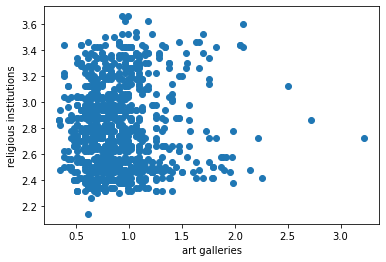

In [73]:
plt.figure()
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.xlabel("art galleries")
plt.ylabel("religious institutions")
plt.show()

In [86]:
params_grid = {
    "n_clusters" : [3],
    "init" : ["k-means++", "random"],
    "n_init" : np.arange(10, 100, step=2),
    "max_iter" : np.arange(100, 1000, step=20),
    "algorithm" : ["full", "elkan"]
}

random_cv = RandomizedSearchCV(KMeans(), params_grid, n_iter=100, n_jobs=-1)
random_cv.fit(data)

print(f"""Optimal KMeans parameters: 
{random_cv.best_params_}
Best params score:
{random_cv.best_score_}
""")

Optimal KMeans parameters: 
{'n_init': 72, 'n_clusters': 3, 'max_iter': 860, 'init': 'random', 'algorithm': 'full'}
Best params score:
-17.193910472107344



In [87]:
kmeans = KMeans(n_init=72, n_clusters=3, max_iter=860, init="random", algorithm="full")
kmeans.fit(data)

KMeans(algorithm='full', init='random', max_iter=860, n_clusters=3, n_init=72)

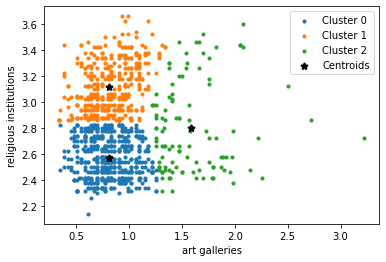

In [89]:
data_np = data.values
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure()
plt.scatter(data_np[labels==0, 0], data_np[labels==0, 1], linewidths=1.1, marker=".", label="Cluster 0")
plt.scatter(data_np[labels==1, 0], data_np[labels==1, 1], linewidths=1.1, marker=".", label="Cluster 1")
plt.scatter(data_np[labels==2, 0], data_np[labels==2, 1], linewidths=1.1, marker=".", label="Cluster 2")
plt.scatter(centroids[:, 0], centroids[:, 1], color="black", linewidths=2.1, marker="*", label="Centroids")
plt.xlabel("art galleries")
plt.ylabel("religious institutions")
plt.legend()
plt.show()

In [101]:
test_data = [[1.32, 2.54]]
y_pred = kmeans.predict(test_data)
print(f"""Predicted class {y_pred[0]} from {test_data[0]}""")

Predicted class 2 from [1.32, 2.54]
